In [99]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [100]:
X_train = np.loadtxt('dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('dataset/labels_test.csv', delimiter = ',')

In [43]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [44]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


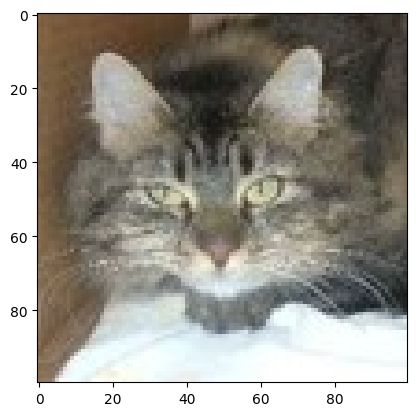

In [94]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [49]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [50]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [51]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [52]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 20s 573ms/step - loss: 0.7496 - accuracy: 0.5055
Epoch 2/5
32/32 [==============================] - 18s 560ms/step - loss: 0.6897 - accuracy: 0.5555
Epoch 3/5
32/32 [==============================] - 18s 548ms/step - loss: 0.6551 - accuracy: 0.6145
Epoch 4/5
32/32 [==============================] - 17s 543ms/step - loss: 0.5875 - accuracy: 0.7030
Epoch 5/5
32/32 [==============================] - 18s 565ms/step - loss: 0.5323 - accuracy: 0.7435


In [54]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 108ms/step - loss: 0.6393 - accuracy: 0.6325


[0.6393280625343323, 0.6324999928474426]

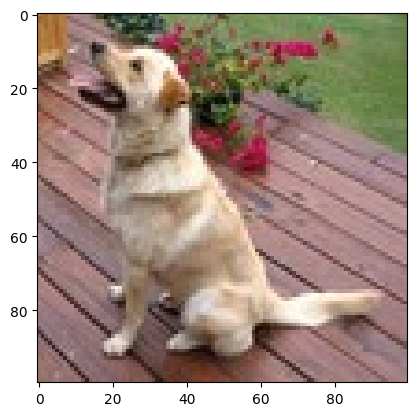

1/1 [==============================] - 0s 100ms/step
Hewan ini adalah hewan : Anjing


In [98]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'Anjing'
else:
    pred = 'Kucing'
    
print("Hewan ini adalah hewan :", pred)

In [18]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("Training Accuracy:", accuracy)

63/63 [==============================] - 7s 114ms/step - loss: 0.4706 - accuracy: 0.8080
Training Accuracy: 0.8080000281333923


Epoch 1/5
32/32 [==============================] - 25s 708ms/step - loss: 0.6963 - accuracy: 0.5285 - val_loss: 0.7429 - val_accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 25s 786ms/step - loss: 0.6639 - accuracy: 0.5920 - val_loss: 0.6271 - val_accuracy: 0.6625
Epoch 3/5
32/32 [==============================] - 25s 795ms/step - loss: 0.6024 - accuracy: 0.6815 - val_loss: 0.6483 - val_accuracy: 0.6300
Epoch 4/5
32/32 [==============================] - 23s 721ms/step - loss: 0.5662 - accuracy: 0.7195 - val_loss: 0.6101 - val_accuracy: 0.6875
Epoch 5/5
32/32 [==============================] - 25s 795ms/step - loss: 0.4981 - accuracy: 0.7665 - val_loss: 0.6107 - val_accuracy: 0.6925


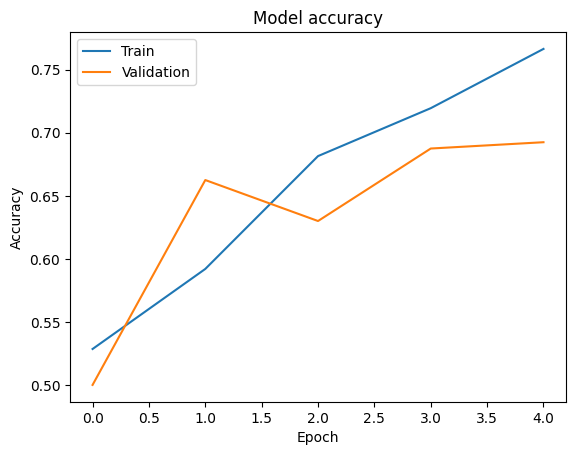

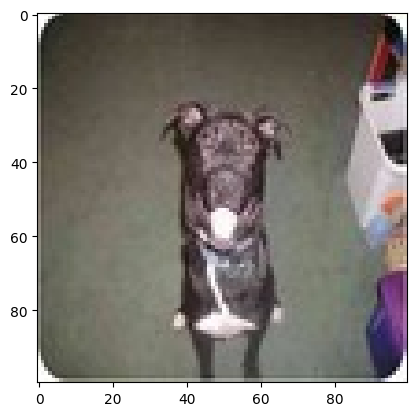

1/1 [==============================] - 0s 148ms/step
Our model says it is a : dog


In [40]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv')

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_data=(X_test, Y_test))

# Plotting accuracy and loss for the training and validation set
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluating the model on the test set
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)